# **Kaggle – DataTops®**
Tu TA ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Aspectos importantes
- Última submission:
    - Mañana: 17 de febrero a las 5pm
    - Tarde: 19 de febrero a las 5pm
- **Enlace de la competición**: https://www.kaggle.com/t/c5cc87b50c4b4770bdc8f5acbe15577d
- **Requisito**: Estar registrado en [Kaggle](https://www.kaggle.com/)

## Métrica:
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [40]:
import numpy as np
import pandas as pd
import re
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import urllib.request

## 2. Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle
df = pd.read_csv("./data/train.csv",index_col = "laptop_ID")
#df = pd.read_csv("./data/train.csv")

### 2.1 Exploración de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [4]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [5]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
laptop_ID,,,,,,,,,,,,
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,912.0,14.981579,1.436719,10.1,14.0,15.6,15.6000,18.4
Price_in_euros,912.0,1111.724090,687.959172,174.0,589.0,978.0,1483.9425,6099.0


### 2.3 Definir X e y

In [7]:
X = df.drop(['Price_in_euros'], axis=1)
y = df['Price_in_euros'].copy()
X.shape

(912, 11)

In [8]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [10]:
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
laptop_ID,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg
...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg


In [11]:
y_train

laptop_ID
1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [12]:
target = "Price_in_euros"

In [13]:
X_train["ram_gb"] = X_train["Ram"].str.replace("GB","").astype(int)
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb
laptop_ID,,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg,8
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,16
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,8
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg,4
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,16
...,...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg,8
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,6
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,16


In [14]:
X_train["Weight"].value_counts()

Weight
2.2kg     74
2.1kg     33
2.4kg     25
2.5kg     24
2.3kg     23
          ..
2.13kg     1
2.26kg     1
0.69kg     1
1.89kg     1
1.18kg     1
Name: count, Length: 148, dtype: int64

In [15]:
X_train["weight_kg"] = X_train["Weight"].str.replace("kg","").astype(float)
X_train

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg
laptop_ID,,,,,,,,,,,,,
1118,HP,ZBook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,AMD FirePro W6150M,Windows 7,3.0kg,8,3.00
153,Dell,Inspiron 5577,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.56kg,16,2.56
275,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,8,1.37
1100,HP,EliteBook 840,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,1.54kg,4,1.54
131,Dell,Inspiron 5770,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.8kg,16,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8GB,2TB HDD,Intel HD Graphics 405,Windows 10,1.94kg,8,1.94
996,Lenovo,IdeaPad 320-15ABR,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,6,2.20
770,Dell,Latitude 7280,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.18kg,16,1.18


-----------------------------------------------------------------------------------------------------------------

In [16]:
features_num = ["Inches","ram_gb","weight_kg"]

<Axes: >

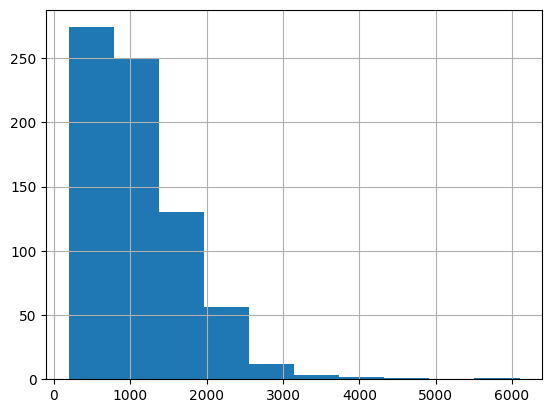

In [17]:
y_train.hist()

## 4. Modelado

### 4.1 Baseline de modelos


In [18]:
X_test["weight_kg"] = X_test["Weight"].str.replace("kg","").astype(float)
X_test["ram_gb"] = X_test["Ram"].str.replace("GB","").astype(int)
X_train = X_train[features_num]
X_train

,Inches,ram_gb,weight_kg
laptop_ID,,,
1118,17.3,8,3.00
153,15.6,16,2.56
275,13.3,8,1.37
1100,14.0,4,1.54
131,17.3,16,2.80
...,...,...,...
578,14.0,8,1.94
996,15.6,6,2.20
770,12.5,16,1.18


In [19]:
X_test = X_test[features_num]
X_test

,Inches,ram_gb,weight_kg
laptop_ID,,,
451,15.6,8,2.20
802,15.6,8,2.08
723,14.0,8,1.87
682,14.0,4,1.63
1306,15.6,4,2.20
...,...,...,...
369,15.6,8,1.86
626,11.6,4,1.25
416,11.6,2,1.15


In [20]:
randomf = RandomForestRegressor(max_depth = 6,
                                random_state = 42)
randomf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [21]:
y_pred = randomf.predict(X_test)

### 4.2 Sacar métricas, valorar los modelos

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [22]:
root_mean_squared_error(y_test,y_pred)

482.7882729044049

### 4.3 Optimización (up to you 🫰🏻)

-----------------------------------------------------------------

### 4.3 Optimización (CV + búsqueda de hiperparámetros)

A partir de aquí añadimos una versión **más robusta** del modelo usando:

- **Feature engineering automático** (RAM, peso, resolución, CPU/GPU, SSD/HDD, etc.)
- **Pipeline** para asegurar mismas transformaciones en train y test
- **Cross-validation** (KFold) + **RandomizedSearchCV**
- Transformación del target con `log1p` para estabilizar precios

> Nota: esto no elimina tu baseline; lo deja y añade una opción mejorada.


In [ ]:
# --- Transformer de feature engineering ---
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # RAM (e.g. "8GB")
        if "Ram" in X.columns:
            X["ram_gb"] = (
                X["Ram"].astype(str)
                .str.replace("GB","", regex=False)
                .str.extract(r"(\d+)", expand=False)
                .astype(float)
            )

        # Peso (e.g. "1.37kg")
        if "Weight" in X.columns:
            X["weight_kg"] = (
                X["Weight"].astype(str)
                .str.replace("kg","", regex=False)
                .str.extract(r"([0-9]+\.?[0-9]*)", expand=False)
                .astype(float)
            )

        # Resolución / pantalla desde 'ScreenResolution'
        if "ScreenResolution" in X.columns:
            sr = X["ScreenResolution"].astype(str)
            X["is_touchscreen"] = sr.str.contains("Touch", case=False, na=False).astype(int)
            X["is_ips"] = sr.str.contains("IPS", case=False, na=False).astype(int)
            X["is_retina"] = sr.str.contains("Retina", case=False, na=False).astype(int)

            # Extraer WxH (ej: 1920x1080)
            wh = sr.str.extract(r"(\d{3,4})\s*x\s*(\d{3,4})")
            X["res_w"] = pd.to_numeric(wh[0], errors="coerce")
            X["res_h"] = pd.to_numeric(wh[1], errors="coerce")
            X["ppi"] = np.sqrt(X["res_w"]**2 + X["res_h"]**2) / pd.to_numeric(X.get("Inches"), errors="coerce")

        # CPU: frecuencia y familia
        if "Cpu" in X.columns:
            cpu = X["Cpu"].astype(str)
            X["cpu_ghz"] = pd.to_numeric(cpu.str.extract(r"([0-9]+\.?[0-9]*)GHz")[0], errors="coerce")
            X["cpu_brand"] = cpu.str.split().str[0]
            X["cpu_family"] = cpu.str.extract(r"(i3|i5|i7|i9|Ryzen\s*\d|M\d|Celeron|Pentium|Atom)", flags=re.I, expand=False)

        # GPU: marca
        if "Gpu" in X.columns:
            gpu = X["Gpu"].astype(str)
            X["gpu_brand"] = gpu.str.split().str[0]

        # Memoria (ej: "256GB SSD", "1TB HDD", "256GB SSD + 1TB HDD")
        if "Memory" in X.columns:
            mem = X["Memory"].astype(str)
            # total SSD
            ssd_gb = mem.str.extractall(r"(\d+(?:\.\d+)?)\s*(TB|GB)\s*SSD", flags=re.I)
            if not ssd_gb.empty:
                ssd_gb = ssd_gb.reset_index(level=1, drop=True)
                ssd_val = ssd_gb[0].astype(float) * ssd_gb[1].str.upper().map({"TB":1024, "GB":1})
                X["ssd_gb"] = ssd_val.groupby(level=0).sum()
            else:
                X["ssd_gb"] = np.nan

            # total HDD
            hdd_gb = mem.str.extractall(r"(\d+(?:\.\d+)?)\s*(TB|GB)\s*HDD", flags=re.I)
            if not hdd_gb.empty:
                hdd_gb = hdd_gb.reset_index(level=1, drop=True)
                hdd_val = hdd_gb[0].astype(float) * hdd_gb[1].str.upper().map({"TB":1024, "GB":1})
                X["hdd_gb"] = hdd_val.groupby(level=0).sum()
            else:
                X["hdd_gb"] = np.nan

            X["has_ssd"] = X["ssd_gb"].fillna(0).gt(0).astype(int)
            X["has_hdd"] = X["hdd_gb"].fillna(0).gt(0).astype(int)

        # OS: familia
        if "OpSys" in X.columns:
            os_ = X["OpSys"].astype(str).str.lower()
            X["os_family"] = np.select(
                [
                    os_.str.contains("windows"),
                    os_.str.contains("mac") | os_.str.contains("os x"),
                    os_.str.contains("linux") | os_.str.contains("ubuntu"),
                    os_.str.contains("chrome"),
                ],
                ["windows","mac","linux","chrome"],
                default="other"
            )

        return X

# --- Pipeline completo ---
X_raw = X.copy()

fe = FeatureEngineer()

X_fe_tmp = fe.transform(X_raw)
numeric_cols = X_fe_tmp.select_dtypes(include=["number"]).columns.tolist()
categorical_cols = [c for c in X_fe_tmp.columns if c not in numeric_cols]

numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, numeric_cols),
        ("cat", categorical_tf, categorical_cols),
    ],
    remainder="drop"
)

base_model = ExtraTreesRegressor(random_state=42, n_jobs=-1)

model = Pipeline(steps=[
    ("fe", fe),
    ("preprocess", preprocess),
    ("reg", base_model),
])

# Target transform para estabilizar RMSE en precios
regressor = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

# Scorer RMSE (negativo para maximizar)
rmse_scorer = make_scorer(lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)), greater_is_better=False)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_distributions = {
    "regressor__reg__n_estimators": [400, 800, 1200],
    "regressor__reg__max_depth": [None, 20, 35, 50],
    "regressor__reg__min_samples_split": [2, 5, 10],
    "regressor__reg__min_samples_leaf": [1, 2, 4],
    "regressor__reg__max_features": ["sqrt", 0.5, 0.75, 1.0],
}

search = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=param_distributions,
    n_iter=30,              # si tarda mucho, baja a 15-20
    scoring=rmse_scorer,
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_raw, y)

print("Best CV RMSE:", -search.best_score_)
print("Best params:", search.best_params_)

best_estimator = search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best CV RMSE: 284.00242101516733
Best params: {'regressor__reg__n_estimators': 400, 'regressor__reg__min_samples_split': 5, 'regressor__reg__min_samples_leaf': 1, 'regressor__reg__max_features': 0.5, 'regressor__reg__max_depth': None}


## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [24]:
X_pred = pd.read_csv("./data/test.csv")
X_pred.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1,1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
2,1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
3,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
4,1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [25]:
X_pred.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
387,948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
388,483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
389,1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
390,421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [26]:
X_pred.info()
ids = X_pred["laptop_ID"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


In [27]:
# Guardamos una copia RAW para poder usar el pipeline completo (con categóricas, etc.)
X_pred_raw = X_pred.copy()

 ## 2. Replicar el procesado para ``test.csv``

In [28]:
X_pred["weight_kg"] = X_pred["Weight"].str.replace("kg","").astype(float)
X_pred["ram_gb"] = X_pred["Ram"].str.replace("GB","").astype(int)
X_pred = X_pred[features_num]


In [29]:
predictions_submit = randomf.predict(X_pred)
predictions_submit

array([1533.06155131,  545.92646727,  496.73529282,  860.35628354,
        849.62022491,  577.20728759,  741.33161832, 1291.93014309,
       1652.87124505,  714.49394308, 2297.12269259, 1427.0907884 ,
        583.63060341, 1587.50509265, 1063.48707367,  462.90116719,
       1828.53785888, 1536.62581616, 1706.20143842,  560.10650713,
       1594.31931601,  635.94183133, 1166.11177062, 1566.53498372,
        569.53576336,  860.35628354, 1169.72467062,  986.50810781,
       2434.33199343, 1086.98303702, 1871.18612374,  507.82873857,
       1072.51021537, 3230.26678917, 1998.34153652, 1946.34324772,
        509.95059479, 1518.73650696,  909.14738838, 1428.64835396,
        861.42061771, 1411.00638139,  533.11048953, 1086.98303702,
       1946.34324772,  860.35628354, 1104.07286864,  507.82873857,
        860.35628354,  507.41177714, 1924.31349674,  860.35628354,
        943.43956064,  507.75101595, 1555.6501658 , 1813.18937339,
        530.55812011,  946.35230048, 1063.48707367,  633.75301

In [ ]:
if "best_estimator" in globals():
    predictions_submit = best_estimator.predict(X_pred_raw)
    predictions_submit[:10]

**¡OJO! ¿Por qué me da error?**

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [31]:
# ¿Qué opináis?
# ¿Sí, no?

![wow.jpeg](attachment:wow.jpeg)

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`.

In [32]:
sample = pd.read_csv("data/sample_submission.csv")
submission = sample.copy()
submission["Price_in_euros"] = predictions_submit
submission

,laptop_ID,Price_in_euros
0,209,2167.656950
1,1281,283.844996
2,1168,390.114171
3,1231,1152.217701
4,1020,1043.982399
...,...,...
386,820,2211.186267
387,948,968.039515
388,483,1783.758700
389,1017,953.531505


In [33]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [34]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [35]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID" : ids, "Price_in_euros":predictions_submit})

In [36]:
submission.head()

,laptop_ID,Price_in_euros
0,209,2167.656950
1,1281,283.844996
2,1168,390.114171
3,1231,1152.217701
4,1020,1043.982399


In [37]:
submission.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [38]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.

    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.

    Si no, LEE EL MENSAJE Y HAZLE CASO.

    Si aún no:
    - apaga tu ordenador,
    - date una vuelta,
    - enciendelo otra vez,
    - abre este notebook y
    - leelo todo de nuevo.
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")
                img = Image.open("gfg.png")
                img.show()
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [39]:
chequeador(submission)

You're ready to submit!
